In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import scipy as sp

In [4]:
import math

In [5]:
sns.set_style('whitegrid')

In [6]:
df = pd.read_excel('XYZ-1.xlsx', 'Data')

In [7]:
df.head(10)

,Product,1,2,3,4
0,Purchase Cost,12,7,6,37
1,Lead Time,9,6,16,22
2,Size,0.57,0.052,0.53,1.05
3,Selling Price,16.1,8.6,10.2,68
4,Starting Stock,2750,22500,5200,1400
5,Day,Demand,Demand,Demand,Demand
6,0,90,610,204,153
7,1,94,685,244,147
8,2,0,649,197,0
9,3,110,667,0,0


In [8]:
demand = df[6:]

## Part 1

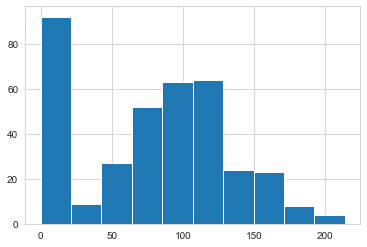

In [15]:
plt.hist(demand[1])
plt.show()

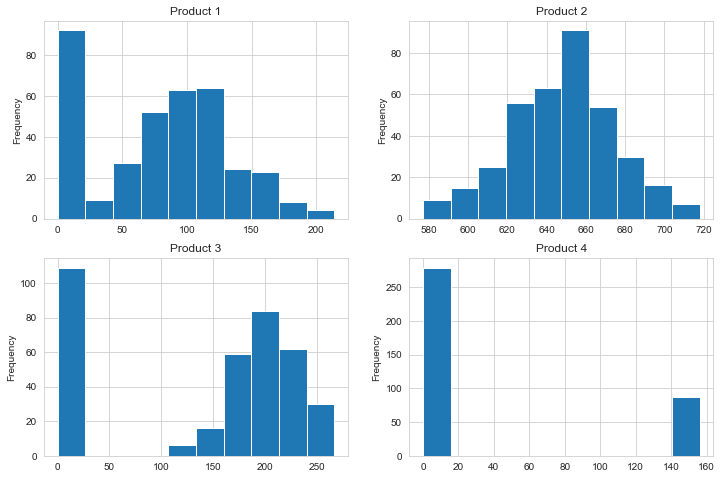

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
demand[1].plot.hist(ax=axes[0,0])
axes[0, 0].set_title('Product 1')
demand[2].plot.hist(ax=axes[0,1])
axes[0, 1].set_title('Product 2')
demand[3].plot.hist(ax=axes[1,0])
axes[1, 0].set_title('Product 3')
demand[4].plot.hist(ax=axes[1,1])
axes[1, 1].set_title('Product 4')

plt.savefig('Pictures/Demand_Dist.png', dpi = 200)

In [9]:
summary = df[0:5].T

new_header = summary.iloc[0] #grab the first row for the header
summary = summary[1:] #take the data less the header row
summary.columns = new_header #set the header row as the df header

In [10]:
summary

Product,Purchase Cost,Lead Time,Size,Selling Price,Starting Stock
1,12,9,0.57,16.1,2750
2,7,6,0.052,8.6,22500
3,6,16,0.53,10.2,5200
4,37,22,1.05,68,1400


In [57]:
for i in range(4):
    print(summary['Lead Time'].iloc[i])

9
6
16
22


In [11]:
mu = []
sd = []
p = []

for i in range(1,5):
    print(f'Product {i} details:')
    print(f' Mean - {np.mean(demand[demand[i]>0][i]):.2f}')
    print(f' Standard Deviation - {np.std(demand[demand[i]>0][i]):.2f}')
    proportion = [1 if j != 0 else 0 for j in demand[i]].count(1)/len(demand[i])
    print(f' Expected proportion of days - {proportion:.2f}\n')
    
    mu.append(np.mean(demand[demand[i]>0][i]))
    sd.append(np.std(demand[demand[i]>0][i]))
    p.append(proportion)
    
summary['Mean'] = mu
summary['Std Dev'] = sd
summary['Probability'] = p

Product 1 details:
 Mean - 103.50
 Standard Deviation - 37.32
 Expected proportion of days - 0.76

Product 2 details:
 Mean - 648.55
 Standard Deviation - 26.45
 Expected proportion of days - 1.00

Product 3 details:
 Mean - 201.68
 Standard Deviation - 31.08
 Expected proportion of days - 0.70

Product 4 details:
 Mean - 150.07
 Standard Deviation - 3.22
 Expected proportion of days - 0.24



In [12]:
mu

[103.50180505415162, 648.551912568306, 201.6770428015564, 150.06896551724137]

In [13]:
summary

Product,Purchase Cost,Lead Time,Size,Selling Price,Starting Stock,Mean,Std Dev,Probability
1,12,9,0.57,16.1,2750,103.501805,37.317994,0.756831
2,7,6,0.052,8.6,22500,648.551913,26.446797,1.000000
3,6,16,0.53,10.2,5200,201.677043,31.079301,0.702186
4,37,22,1.05,68,1400,150.068966,3.215598,0.237705


In [230]:
#for i in range(4):
#    print(f"Expected Demand Product {i+1} during lead time - {summary['Lead Time'].iloc[i] * summary['Mean'].iloc[i]:.2f} \n")

In [14]:
# Drawing from the original distribution

for i in range(4):
    print(f"Expected Demand Product {i+1} during lead time - {summary['Lead Time'].iloc[i] * np.mean(demand[i+1]):.2f} \n")

Expected Demand Product 1 during lead time - 705.00 

Expected Demand Product 2 during lead time - 3891.31 

Expected Demand Product 3 during lead time - 2265.84 

Expected Demand Product 4 during lead time - 784.79 



In [15]:
def get_sqrt(sd, n):
    val = 0
    for i in range(n):
        val += sd**2
        
    return np.sqrt(val)

In [234]:
#for i in range(4):
#    print(f"Expected Std Dev Product {i+1} during lead time - {get_sqrt(summary['Std Dev'].iloc[i], summary['Lead Time'].iloc[i]):.2f} \n")

In [16]:
# Drawing from the original distribution
for i in range(4):
    print(f"Expected Std Dev Product {i+1} during lead time - {get_sqrt(np.std(demand[i+1]), summary['Lead Time'].iloc[i]):.2f} \n")

Expected Std Dev Product 1 during lead time - 165.01 

Expected Std Dev Product 2 during lead time - 64.78 

Expected Std Dev Product 3 during lead time - 383.33 

Expected Std Dev Product 4 during lead time - 299.72 



## Periodic Review

In [83]:
avg = 705.00
std_dev = 165.01
num_reps = 366
num_simulations = 1000

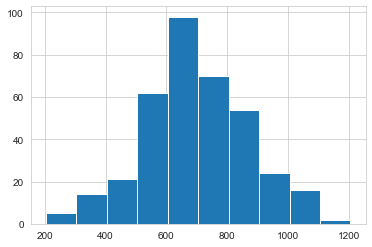

In [86]:
plt.hist(np.random.normal(avg, std_dev, num_reps).round(2))
plt.show()

In [87]:
705 + 165*2.33

1089.45

In [181]:
summary['Co'] = [1000, 1200, 1000, 1200]
summary['Ch'] = [20, 20, 20, 20]

In [307]:
summary

Product,Purchase Cost,Lead Time,Size,Selling Price,Starting Stock,Mean,Std Dev,Co,Ch,Probability
1,12,9,0.57,16.1,2750,103.501805,37.317994,1000,20,0.756831
2,7,6,0.052,8.6,22500,648.551913,26.446797,1200,20,1.000000
3,6,16,0.53,10.2,5200,201.677043,31.079301,1000,20,0.702186
4,37,22,1.05,68,1400,150.068966,3.215598,1200,20,0.237705


In [343]:
inventory = summary['Starting Stock'].iloc[0]
#mean = summary['Mean'].iloc[0]
#sd = summary['Std Dev'].iloc[0]

mean = np.mean([np.log(i) for i in demand[demand[1] > 0][1]])
sd = np.std([np.log(i) for i in demand[demand[1] > 0][1]])

lead_time = summary['Lead Time'].iloc[0]
review_period = 30
profit_per_unit = summary['Selling Price'].iloc[0] #- summary['Purchase Cost'].iloc[0]
unit_cost = summary['Purchase Cost'].iloc[0]
prob = summary['Probability'].iloc[0]

M = 2750
d = 0 # number of days
profit = 0
Q = 0
stock_out = 0

for d in range(365):
    
    dd = daily_demand(mean, sd, prob)
    if d % (review_period + lead_time) != 0:
        inventory, stock_out = update_inventory(inventory, dd, stock_out)
        profit = update_profit(inventory, dd, profit_per_unit, profit)
        
    else:
        Q = M - inventory
        inventory = inventory + Q - dd
        profit += profit_per_unit * dd

In [287]:
review_period + lead_time

39

In [585]:
def monte_carlo_ray(M, inventory, mean, sd, lead_time, review_period, profit_per_unit, prob, unit_cost):
    profit = 0
    Q = 0
    stock_out = 0
    cost = 0
    
    Ch = 20
    size = 0.57
    Co = 1000
    
    #inventory_level = []
    data = {}
    data['inventory_level'] = []
    data['daily_demand'] = []
    data['units_sold'] = []
    data['Order'] = []
    units_sold = 0
    
    number_of_orders = 0

    for d in range(1,366):
        
        cost += inventory * Ch * size * (1/365)

        dd = daily_demand(mean, sd, prob)
        if d % (review_period + lead_time) != 0:
            inventory, stock_out = update_inventory(inventory, dd, stock_out)
            profit = update_profit(inventory, dd, profit_per_unit, profit)

        else:
            Q = M - inventory
            number_of_orders += 1
            cost += Co + (unit_cost*Q)
            inventory = max(inventory + Q - dd, 0)
            profit += profit_per_unit * dd
            data['Order'].append(Q)
            
        if (inventory - dd) > 0:
            units_sold = dd
        else:
            units_sold = inventory
            
        data['inventory_level'].append(inventory)
        data['daily_demand'].append(dd)
        data['units_sold'].append(units_sold)
        
            
    #print('Number of orders : ', number_of_orders)
    return (round(profit-cost,2), stock_out, data)

In [426]:
def daily_demand(mean, sd, prob):
    
    random_num = np.random.uniform(0,1)
    if random_num > prob:
        return 0
    else:
        return np.exp(np.random.normal(mean, sd))

In [341]:
(mean, sd)

(4.559987732142972, 0.4349019636615757)

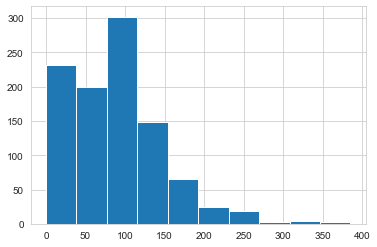

In [405]:
plt.hist([daily_demand(mean, sd, prob) for i in range(1,1000)])
plt.show()

In [329]:
def update_inventory(inventory, dd, stock_out):
    if inventory - dd < 0:
        return 0, stock_out+1
    else:
        return inventory - dd, stock_out

In [356]:
def update_profit(inventory, dd, profit_per_unit, profit):
    if inventory - dd < 0:
        profit += profit_per_unit * inventory
        return profit
    else:
        profit += profit_per_unit * dd
        return profit

In [601]:
inventory = summary['Starting Stock'].iloc[0]
#mean = summary['Mean'].iloc[0]
#sd = summary['Std Dev'].iloc[0]

mean = np.mean([np.log(i) for i in demand[demand[1] > 0][1]])
sd = np.std([np.log(i) for i in demand[demand[1] > 0][1]])

lead_time = summary['Lead Time'].iloc[0]
review_period = 30
profit_per_unit = summary['Selling Price'].iloc[0] #- summary['Purchase Cost'].iloc[0]
unit_cost = summary['Purchase Cost'].iloc[0]
prob = summary['Probability'].iloc[0]

M = 3000
profit, stock_out, data = monte_carlo_ray(M, inventory, mean, sd, lead_time, review_period, profit_per_unit, prob, unit_cost)

new_profit = (np.sum(data['units_sold'])*16.1) - 9000 - (sum(data['inventory_level']) * 0.57 * (20/365)) - (sum(data['Order']) * 12)

(new_profit, stock_out)

(84476.7977367157, 13)

In [600]:
profit

85330.29

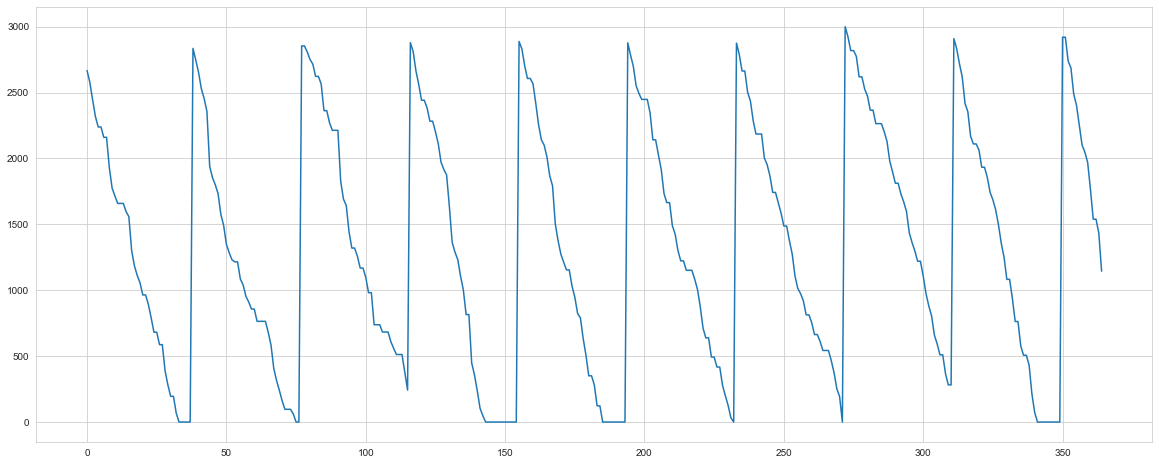

In [590]:
plt.figure(figsize=(20,8))
plt.plot(data['inventory_level'])

In [458]:
# Profit calc
(np.sum(data['units_sold'])*16.1) - 9000 - (sum(data['inventory_level']) * 0.57 * (20/365)) - (sum(data['Order']) * 12)

49515.68842735095

In [416]:
np.mean(data['units_sold'])

81.41610567537425

In [602]:
num_simulations = 1000

profit_list = []
stock_out_list = []

for sim in range(num_simulations):
    M = 3000
    p, s, data  = monte_carlo_ray(M, inventory, mean, sd, lead_time, review_period, profit_per_unit, prob, unit_cost)
    #profit_list.append(p)
    stock_out_list.append(s)
    
    new_profit = (np.sum(data['units_sold'])*16.1) - 9000 - (sum(data['inventory_level']) * 0.57 * (20/365)) - (sum(data['Order']) * 12)
    profit_list.append(new_profit)

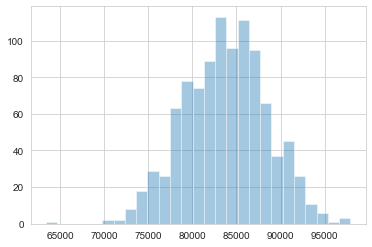

In [603]:
sns.distplot(profit_list, kde=False)
plt.show()

In [524]:
len(data['Order'])

9

In [604]:
np.mean(profit_list)

83748.70421348038

In [605]:
np.std(profit_list)

4685.18334597671

In [465]:
sum(data['inventory_level'])

96071.76170970759

In [468]:
sum(data['units_sold'])

10634.426153931669

In [516]:
summary

Product,Purchase Cost,Lead Time,Size,Selling Price,Starting Stock,Mean,Std Dev,Co,Ch,Probability
1,12,9,0.57,16.1,2750,103.501805,37.317994,1000,20,0.756831
2,7,6,0.052,8.6,22500,648.551913,26.446797,1200,20,1.000000
3,6,16,0.53,10.2,5200,201.677043,31.079301,1000,20,0.702186
4,37,22,1.05,68,1400,150.068966,3.215598,1200,20,0.237705


In [606]:
# Product 1

inventory = summary['Starting Stock'].iloc[0]
#mean = summary['Mean'].iloc[0]
#sd = summary['Std Dev'].iloc[0]

mean = np.mean([np.log(i) for i in demand[demand[1] > 0][1]])
sd = np.std([np.log(i) for i in demand[demand[1] > 0][1]])

lead_time = summary['Lead Time'].iloc[0]
review_period = 30
profit_per_unit = summary['Selling Price'].iloc[0] #- summary['Purchase Cost'].iloc[0]
unit_cost = summary['Purchase Cost'].iloc[0]
prob = summary['Probability'].iloc[0]

num_simulations = 100

profit_list = []
stock_out_list = []
Order_dict = {}

#m_range = np.linspace(inventory, 2*inventory, 2*inventory - inventory + 1)
m_range = [r for r in range(1500, 6000, 50)]

for M in m_range:
    for sim in range(num_simulations):
        #M = 2750
        p, s, data  = monte_carlo_ray(M, inventory, mean, sd, lead_time, review_period, profit_per_unit, prob, unit_cost)
        #profit_list.append(p)
        stock_out_list.append(s)
        
        new_profit = (np.sum(data['units_sold'])*16.1) - 9000 - (sum(data['inventory_level']) * 0.57 * (20/365)) - (sum(data['Order']) * 12)
        profit_list.append(new_profit)
        
    Order_dict[M] = (np.mean(profit_list), np.std(profit_list))

In [607]:
xx = [i for i in Order_dict.keys()]
yy = []
for val in Order_dict.values():
    yy.append(val[0])

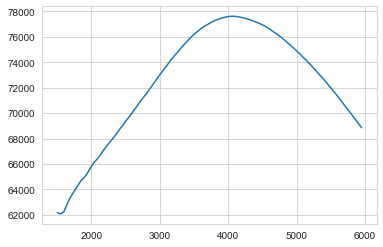

In [608]:
plt.plot(xx, yy)

In [493]:
for key, val in Order_dict.items():
    if 77576 < Order_dict[key][0] < 77577:
        print(key)

4050


In [609]:
Order_dict[3000]

(73011.89831419243, 7997.358378611355)

In [610]:
Order_dict[4050]

(77615.31000553949, 9177.285602038293)

## Continous Review